# Spain Covid Cases

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
# Alternative plotting backend for interative data exploration
# %matplotlib notebook

from coronavirus import overview, fetch_data_germany, germany_get_region

# If you want to edit the source in the notebook, try "%load coronavirus.py" 
# and comment out the import statement above.

In [3]:
spanish_cases_web = "https://covid19.isciii.es/resources/serie_historica_acumulados.csv"

In [4]:
cases_web = pd.read_csv(spanish_cases_web, encoding="ISO-8859-1", engine="python", skipfooter=3)

In [14]:
set(cases_web["CCAA"])

{'AN',
 'AR',
 'AS',
 'CB',
 'CE',
 'CL',
 'CM',
 'CN',
 'CT',
 'EX',
 'GA',
 'IB',
 'MC',
 'MD',
 'ML',
 'NC',
 'PV',
 'RI',
 'VC'}

Downloaded data: last data point 4/11/20 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Downloaded data: last data point 4/11/20 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


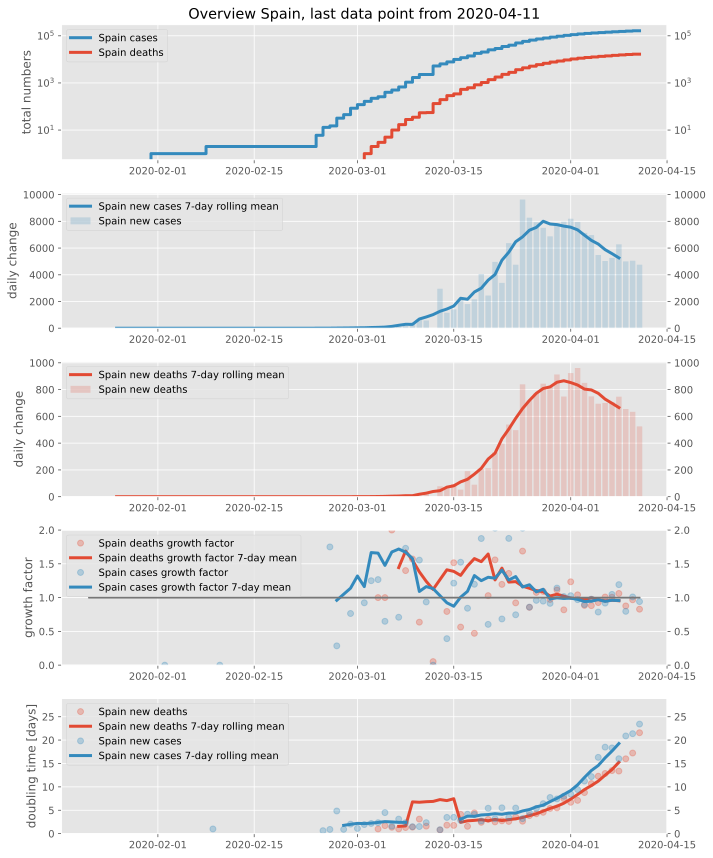

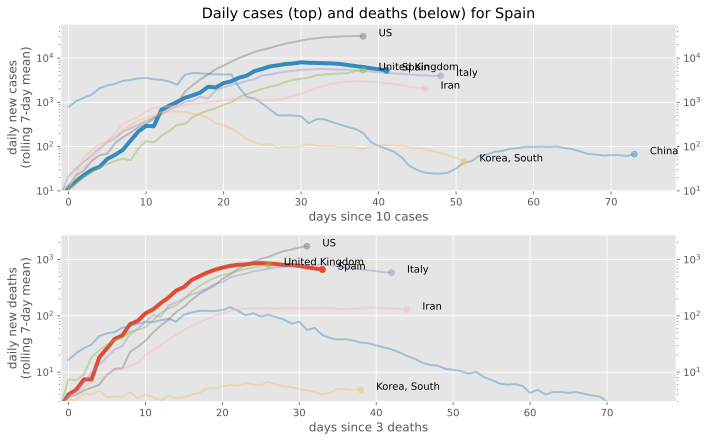

In [7]:
overview("Spain");

In [7]:
# Rename columns 
cases.rename(columns={'CCAA Codigo ISO': 'ISO code adm. region',
                      'Fecha': 'Date',
                      'Casos ': 'Cases',
                      'Hospitalizados': 'Hospitalized',
                      'UCI': 'ICU',
                      'Fallecidos': 'Deceases'}, inplace=True)

In [8]:
# Convert dates to datetime objects
cases['Date'] = pd.to_datetime(cases.Date, dayfirst=True)

In [9]:
# Choose a region, e.g. Andalucia == AN
cases_Andalucia = cases[cases["ISO code adm. region"] == "AN"]

In [10]:
deaths_Andalucia = cases_Andalucia["Deceases"].values

# Apparently this is the cumulative sum

<IPython.core.display.Javascript object>


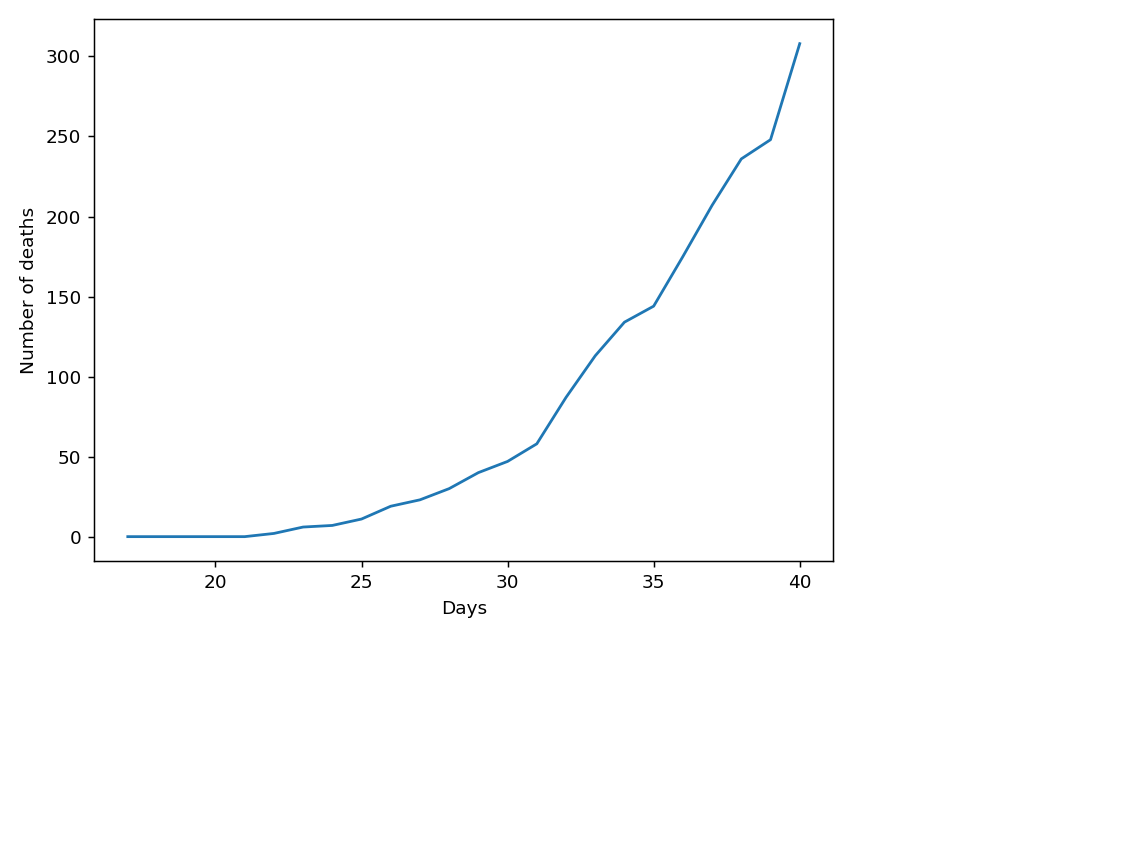

In [12]:
%matplotlib notebook

fig, ax = plt.subplots()
ax.plot(deaths_Andalucia)
ax.set_ylabel("Number of deaths")
ax.set_xlabel("Days")
plt.tight_layout();

In [13]:
cases_Andalucia_daily = cases_Andalucia.sort_values("Date").groupby(["Date"])["Deceases"].sum()

<IPython.core.display.Javascript object>


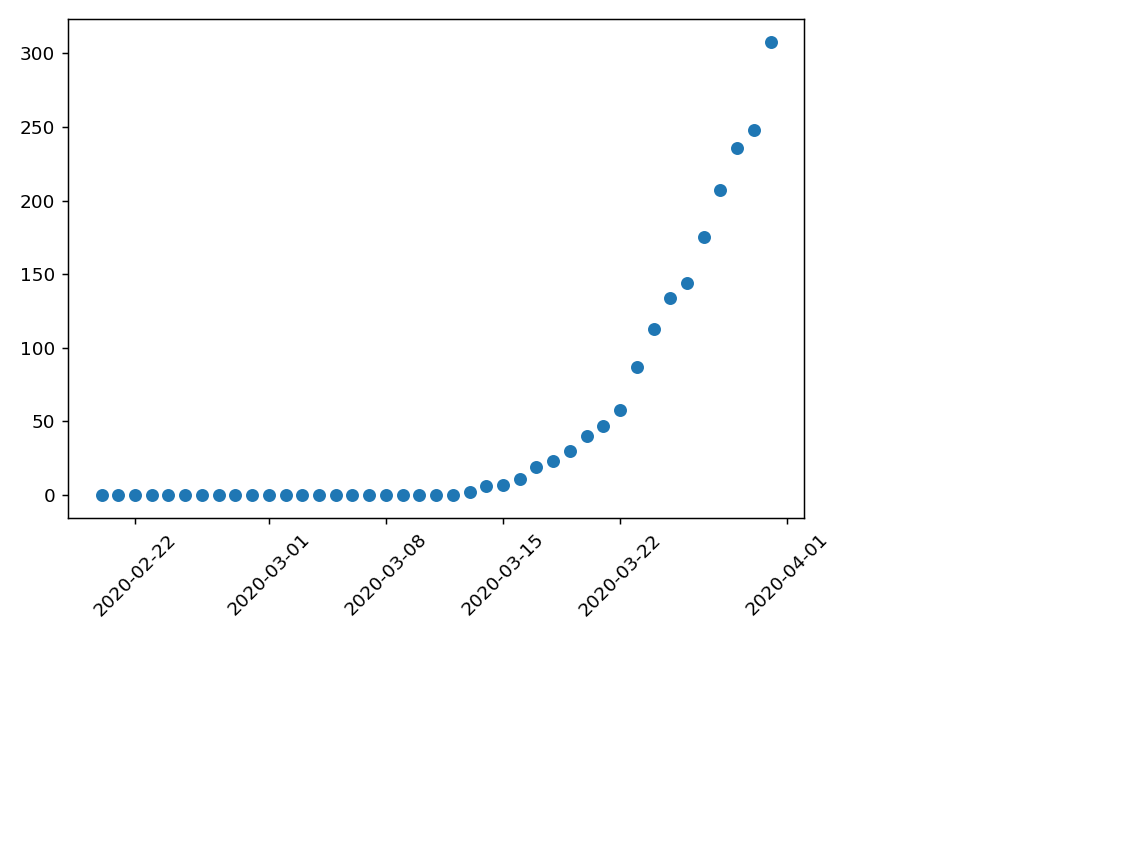

In [22]:
%matplotlib notebook

fig, ax = plt.subplots()
ax.plot(cases_Andalucia_daily, 'o')
# to make the tick on x plot more sparse
#plt.xticks(range(cases_Andalucia_daily.shape[0])[::3],
#           [str(x) for x in cases_Andalucia_daily.index.tolist()][::3],
#           rotation = 45)
ax.xaxis.set_tick_params(rotation=45)
fig.tight_layout();

In [17]:
cases_Andalucia_daily

Date
2020-02-20      0.0
2020-02-21      0.0
2020-02-22      0.0
2020-02-23      0.0
2020-02-24      0.0
2020-02-25      0.0
2020-02-26      0.0
2020-02-27      0.0
2020-02-28      0.0
2020-02-29      0.0
2020-03-01      0.0
2020-03-02      0.0
2020-03-03      0.0
2020-03-04      0.0
2020-03-05      0.0
2020-03-06      0.0
2020-03-07      0.0
2020-03-08      0.0
2020-03-09      0.0
2020-03-10      0.0
2020-03-11      0.0
2020-03-12      0.0
2020-03-13      2.0
2020-03-14      6.0
2020-03-15      7.0
2020-03-16     11.0
2020-03-17     19.0
2020-03-18     23.0
2020-03-19     30.0
2020-03-20     40.0
2020-03-21     47.0
2020-03-22     58.0
2020-03-23     87.0
2020-03-24    113.0
2020-03-25    134.0
2020-03-26    144.0
2020-03-27    175.0
2020-03-28    207.0
2020-03-29    236.0
2020-03-30    248.0
2020-03-31    308.0
Name: Deceases, dtype: float64

In [ ]:
counties_hamburg_cases = counties_hamburg["cases"].values[0]
cases_hamburg_sum = sum(cases_hamburg["AnzahlFall"])

if counties_hamburg_cases != cases_hamburg_sum:
    print("Warning, inconsistent case numbers!")
    print(f"Reported total cases in Hamburg {counties_hamburg_cases}, sum of cases {cases_hamburg_sum}")